In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import xgboost as xgb
from scipy.sparse import *

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline         

import matplotlib
import matplotlib.cm as cm

sns.set_style("white")
sns.set_style("ticks")
matplotlib.rcParams.update({'font.size': 20})

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
 
stop_words = stopwords.words('english') + list(punctuation) + ['``',"''"]
 
def tokenize(text):
    words = word_tokenize(text)
    return [w.lower() for w in words]

In [82]:
#defining various functions

#score over one corpus by summing all vector representations, pick the topn words with highest score
def score_corpus(corpus,topn=25):
    score=np.array(np.sum(tfidf.transform(corpus),axis=0)/len(corpus))[0]
    ind = score.argsort()[-topn:][::-1]
    return [[dictionary[idx] , score[idx]] for idx in ind]

def diff_corpus(corpus1,corpus2,topn=30):
    score1 =np.array(np.sum(tfidf.transform(corpus1),axis=0)/len(corpus1))[0]
    score2 =np.array(np.sum(tfidf.transform(corpus2),axis=0)/len(corpus2))[0]
    score = score1-score2
    ind_max = score.argsort()[-topn:][::-1]
    ind_min = score.argsort()[:topn][::-1]
    lab=[dictionary[idx] for idx in ind_max]+[dictionary[idx]  for idx in ind_min]
    val=[ score[idx] for idx in ind_max]+[ score[idx] for idx in ind_min]
    return [lab,val]

In [6]:
df_tot= pd.read_csv('../kickstarter_clean.csv')

In [7]:
df_tot['main_cat'].value_counts()

music           20289
film & video    17522
art             13172
publishing      12456
technology      11514
food            11135
games            7174
fashion          6796
comics           5709
theater          4484
design           4316
photography      3888
crafts           3863
journalism       2656
dance            2398
Name: main_cat, dtype: int64

In [122]:
#cat='Food'
cat='food'

In [123]:
df=df_tot[df_tot['main_cat']==cat].reset_index()

In [124]:
df['y'].value_counts()

0    6876
1    4259
Name: y, dtype: int64

In [125]:
df['tiblu']=df['name']+' '+df['blurb']

In [126]:
texts=[]
for idx in range(len(df)):
    texts.append(df['tiblu'][idx].decode('utf-8'))

In [127]:
texts[1]

u'#9ETWELLSOON The #9ETWELLSOON campaign is my most recent passion project that emerged out of a need to create a positive lifestyle change.'

In [128]:
# build the vocabulary in one pass
vocabulary = set([word for text in texts for word in tokenize(text.replace("'s",'').replace("'",''))])

In [129]:
tfidf = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize, vocabulary=vocabulary)

In [130]:
# Fit the TfIdf model
tfidf.fit([text.replace("'s",'').replace("'",'') for text in texts])
 

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'w...', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '``', "''"],
        strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x10e94e6e0>, use_idf=True,
        vocabulary=set([u'xylem', u'remastered', u'quisine', u'gai', u'bonzai', u'klatka', u'yellow', u'museum/restaurant', u'four', u'down-p

In [131]:
# Transform a document into TfIdf coordinates
values = list(vocabulary)
keys = [tfidf.vocabulary_[word] for word  in values]
dictionary = dict(zip(keys, values))

In [132]:
fund_texts=np.array(texts)[df['y']==1]
not_fund_texts=np.array(texts)[df['y']==0]

In [137]:
score_food=diff_corpus(fund_texts,not_fund_texts,10)
#score_fv=diff_corpus(fund_texts,not_fund_texts,10)

/Users/marcofarina/Library/Python/2.7/lib/python/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


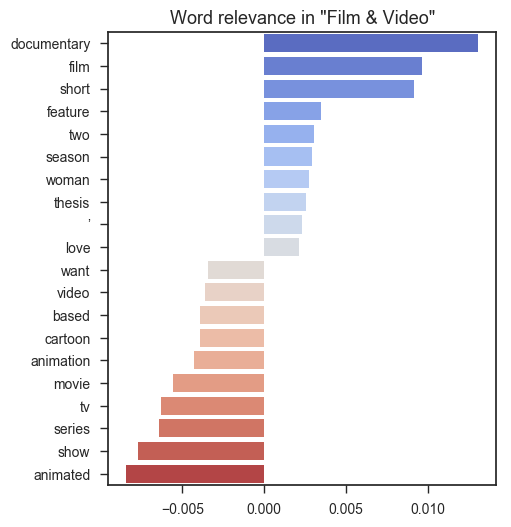

In [121]:
plt.figure(figsize=(5.,6), dpi=100)
sns.barplot(y =score_fv[0], x =score_fv[1],palette="coolwarm")
plt.title('Word relevance in "Film & Video"', fontsize=13)
plt.savefig("tfidf_film.png", dpi=100,bbox_inches='tight')
plt.show()

/Users/marcofarina/Library/Python/2.7/lib/python/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


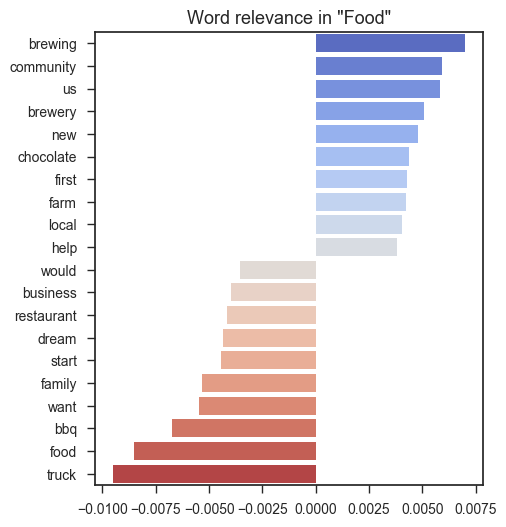

In [139]:
plt.figure(figsize=(5.,6), dpi=100)
sns.barplot(y =score_food[0], x =score_food[1],palette="coolwarm")
plt.title('Word relevance in "Food"', fontsize=13)
plt.savefig("tfidf_food.png", dpi=100,bbox_inches='tight')
plt.show()